## This is a title! :)
Ok now you can write text here. I did this by going to Cell, cell type, and then selecting markdown


In [1]:
#Now this is for code

## Fish Project
1. Question

    How would fish population change if a new predator were introduced?
    This matters because it would inform people about the dangers of invasive species, and also fisherman would care a lot about 
    a decline in fish population
    
2. Model

    Number of fish
    Number of fish and fish eggs consumed by predator
    Natural birth and death rate of fish
    Predator birth and death rate?
    Updating number of fish and predators action
    Metrics: Number of fish still alive after predators introduced (as %?)
    
3. Results

    Number of fish and number of predators are expected to be inveresely proportional
    But maybe there is also the added complexity of predators increase so fish decline so predators decline so fish increase
    
4. Interpretation

    By inputting different numbers of predators we could see how many fish make up the population


## Code Starts Here
Question: What would the prey population be t days into the model depending on predator population?
Initial predator population (variable)
Predator growth function (function) 
Natural birth rate prey (variable)
Natural death rate prey (variable)
Prey killed by predator (function of #predators and #prey)





In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
from pandas import read_html

In [39]:


ry_system = System(,
                  )

r_initial_pop_array = linrange (0, 500, 50, endpoint=True)
y_initial_pop_array = linrange (0, 1000, 100, endpoint=True)

def y_murder_rate(r_pop, y_pop):
    

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000.])

array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [5]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [6]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [7]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [17]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [18]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

In [19]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


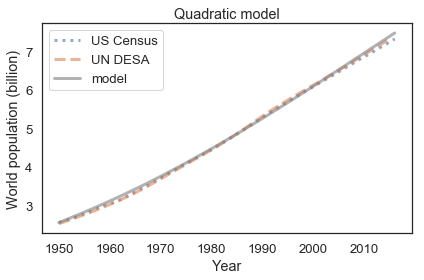

In [20]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

Saving figure to file figs/chap04-fig01.pdf


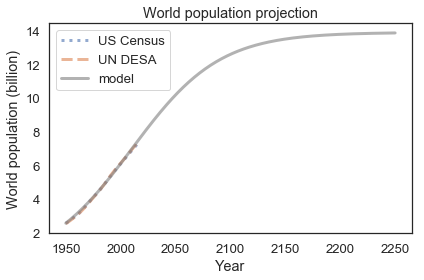

In [21]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('figs/chap04-fig01.pdf')

In [14]:
results[system.t_end]
-system.alpha / system.beta

13.88888888888889